# Proyecto individual de DA: Gaming

## Objetivo de negocio:
Grupo inversor está dispuesto a invertir en el desarrollo de nuevos productos, para ello, nos solicitar lo siguietne:
* Analizar el mercado de videojuegos.
* Identificar posibles nichos para desarrollar nuevos productos.
* Encontrar los insights y presentarlos.

### Preguntas a considerar y responder

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países?
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### Dataset a utilizar
| Archivos:
| ------
| Indicadores_del_desarrollo_humano_mundial Banco Mundial Indicadores de desarrollo humano.
| Console_sales Reporte de ventas anuales de consolas. por marca y modelo.
| Juegos en steam. Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc.
| Video Games Sales Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global).

## Fases de trabajo
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 10% las ventas por sector para el próximo trimestre.*
   2.  *Aumentar en un 10% la plataforma Steam.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Análisis univariado y bivariado
4. Registros duplicados
5. Conclusiones

#### 1.1. Importar Librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil
from scipy.stats import pearsonr

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.3. Creación del DataFrame 2_Console_sales

In [ ]:
df_2 = pd.read_excel('dataset/2_Console_sales.xlsx', sheet_name='Ventas anual')

In [3]:
df_2

,Year,Dato,Console,Company,Sales
0,2011,anual,Nintendo 3DS,Nintendo,12560000.0
1,2012,anual,Nintendo 3DS,Nintendo,13480000.0
2,2013,anual,Nintendo 3DS,Nintendo,14310000.0
3,2014,anual,Nintendo 3DS,Nintendo,9740000.0
4,2015,anual,Nintendo 3DS,Nintendo,7330000.0
...,...,...,...,...,...
79,2014,anual,Xbox360,Microsoft,2600000.0
80,2015,anual,Xbox360,Microsoft,930000.0
81,2016,anual,Xbox360,Microsoft,390000.0
82,2017,anual,Xbox360,Microsoft,60000.0


In [4]:
df_2.columns

Index(['Year', 'Dato', 'Console', 'Company', 'Sales'], dtype='object')

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     84 non-null     int64  
 1   Dato     84 non-null     object 
 2   Console  84 non-null     object 
 3   Company  84 non-null     object 
 4   Sales    84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


#### 1.4. Creación del DataFrame 3_Juegos_steam

Dado que todos los demas dataframe están en mayuscula al principio, se opta por hacer este dataframe tambien de la misma forma

#### 1.5. Creación del DataFrame 4_Video_games_sales

Se observa que existen columnas con casi la mitad de filas, por lo cual, no se considerarán.
* Critic_Score
* Critic_Count
* User_Count
* User_Score
* Rating
* Developer

#### 1.6. Observaciones

* Los tamaños de los DataFrame son pequeños y probablemente no existan problemas al trabarlos en un tablero de control.
* Se han eliminado algunas columnas por datos faltantes. Pero se resolverá en análisis posteriores si se eliminan más por irrelevancia.
* Se observa que el dataframe df_1_1 tiene una estructura rara. Se resolverá más adelante si se normaliza o se deja como está.
* Se ha observado cambiar los nombres de las columnas del df_3 para que queden todos iguales.

#### 2.1. Análisis de nulos

In [6]:
df_2.isnull().sum()

Year       0
Dato       0
Console    0
Company    0
Sales      0
dtype: int64

#### 2.2. Normalizacion de valores

#### 2.3. Observaciones:
* No se observan nulos.

#### 3. Búsqueda de valores atípicos o outliers

##### 3.1. Distribución de los valores en columnas numéricas

In [7]:
# Mostrar todo el DataFrame df_2
pd.set_option('display.max_rows', None)  # Mostrar todas las filas

df_2

,Year,Dato,Console,Company,Sales
0,2011,anual,Nintendo 3DS,Nintendo,12560000.0
1,2012,anual,Nintendo 3DS,Nintendo,13480000.0
2,2013,anual,Nintendo 3DS,Nintendo,14310000.0
3,2014,anual,Nintendo 3DS,Nintendo,9740000.0
4,2015,anual,Nintendo 3DS,Nintendo,7330000.0
5,2016,anual,Nintendo 3DS,Nintendo,7590000.0
6,2017,anual,Nintendo 3DS,Nintendo,6190000.0
7,2018,anual,Nintendo 3DS,Nintendo,3500000.0
8,2008,anual,Nintendo DS,Nintendo,29470000.0
9,2009,anual,Nintendo DS,Nintendo,27280000.0


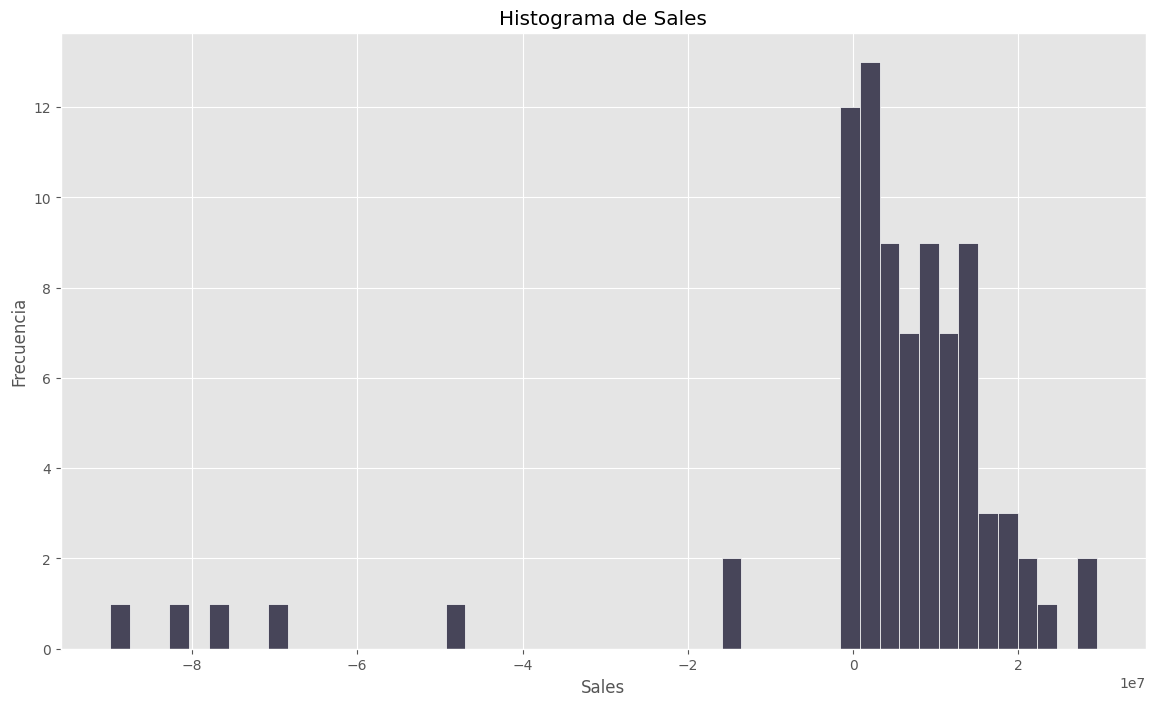

In [8]:
# Crear el histograma solo para 'Sales'
plt.figure(figsize=(14, 8))
plt.hist(df_2['Sales'], bins=50, color='#474559', edgecolor='white')
plt.title('Histograma de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.show()

Observaciones:
* se observa que los valores negativos en la columna Sales corresponden a valores Out_of_use, y se eliminan por considerarse atípicos y que no aportan a un análisis de inversiones.

In [10]:
df_2 = df_2[df_2['Sales'] >= 0]

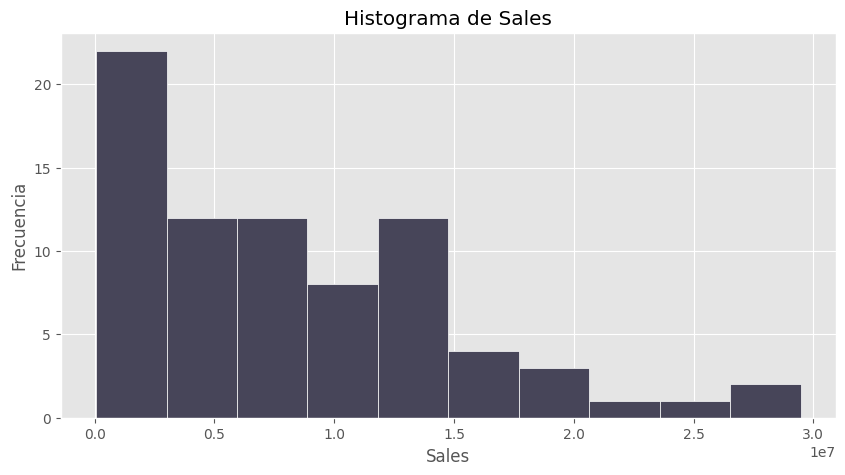

In [11]:
# Crear el histograma solo para 'Sales'
plt.figure(figsize=(10, 5))
plt.hist(df_2['Sales'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.show()

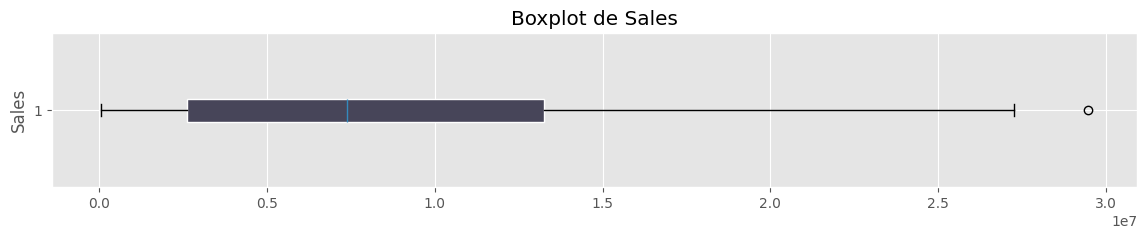

In [12]:
# Crear el boxplot para 'Sales' en vertical
plt.figure(figsize=(14, 2))
plt.boxplot(df_2['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Sales')
plt.ylabel('Sales')
plt.show()

Observaciones:
* Se observa que la mediana de Sales es de 7 millones usd. Hasta 15 millones usd parece probable. Son pocos los casos donde se superan los 20 millones usd.
* Se observan valores outliers pero dentro de la distribución desgada.
* Year_of_Release tiene distribucación sesgada hacia la izquierda lo que quiere decir que la producción de juegos ha ido en aumento.
* Las restantes columnas de Sales tienen distribución sesgada hacia la derecha, lo que quiere decir que la mediana de ventas es de valor entre 0 y 1, pero hay muchos valores dispersos, y cuanto más te alejas menos valores encuentras. Es decir, es dificil lograr grandes ventas en un juego.

#### 4. Análisis de tendencia 

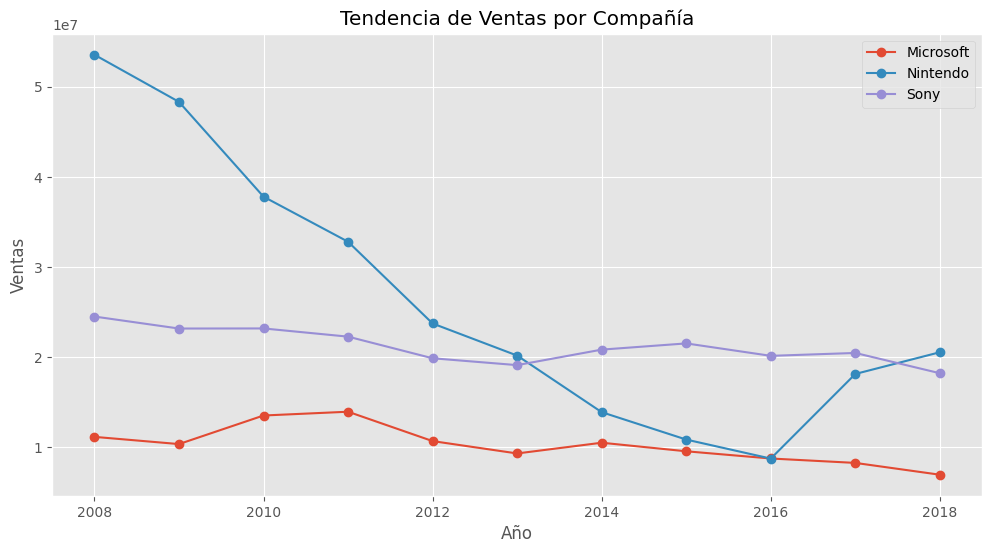

In [13]:
# Sumar las ventas por año para cada compañía
df_2_sum = df_2.groupby(['Year', 'Company'])['Sales'].sum().reset_index()

# Gráfico de tendencia de ventas por compañía
plt.figure(figsize=(12, 6))
for company in df_2_sum['Company'].unique():
    company_data = df_2_sum[df_2_sum['Company'] == company]
    plt.plot(company_data['Year'], company_data['Sales'], marker='o', label=company)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Tendencia de Ventas por Compañía')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Observaciones:
* Se ha representado la suma total de ventas por año.
* Se observa que Nintendo era con diferencia el protagonista en 2008 pero ha caído mucho hasta el 2016, acercándose a Microsoft.
* Tanto Microsoft como Sony se han mantenido prácticamente descendiendo pero de forma mucho menos pronunciada.
* La conclusión desde el 2008 al 2018 es que las ventas por Consola están descendiendo, quizás, por un cambio hacia otros tipos de formas de jugar.

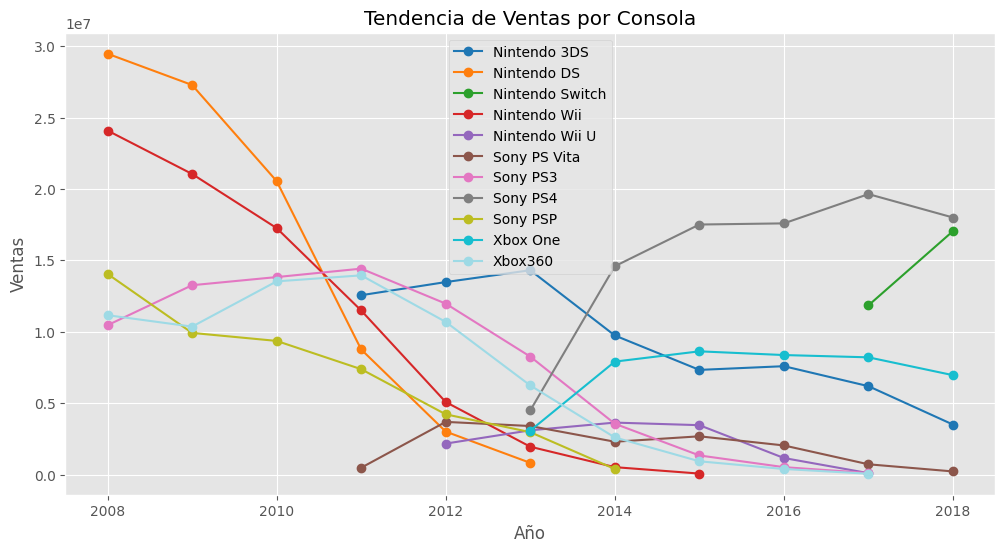

In [ ]:
# Seleccionar las consolas que deseas visualizar
selected_consoles = ['Nintendo 3DS', 'Nintendo DS', 'Nintendo Switch', 'Nintendo Wii',
                     'Nintendo Wii U', 'Sony PS Vita', 'Sony PS3', 'Sony PS4', 'Sony PSP',
                     'Xbox One', 'Xbox360']

# Colores variados para las líneas
colors = plt.cm.get_cmap('tab20', len(selected_consoles))

# Gráfico de tendencia de ventas por consola
plt.figure(figsize=(12, 6))
for idx, console in enumerate(selected_consoles):
    console_data = df_2[df_2['Console'] == console]
    if not console_data.empty:  # Asegurarse de que hay datos para la consola seleccionada
        plt.plot(console_data['Year'], console_data['Sales'], marker='o', label=console, color=colors(idx))

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Tendencia de Ventas por Consola')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Observaciones:
+ Se observa que prácticamente todas las consolas tienen su período de bonanza entre 3 y 5 años y luego comienza el retroceso de ventas y hay que sacar otra consola al mercado.
+ Se observa que solo Nintendo Switch, Sony PS4 y Xbox One pero esto sucedió durante los últimos 5 años, harbía que ver la evolución.
+ Se observa que solo Nintendo Switch parece incrementar las ventas en la compañia Nintendo, en tanto que Wii y DS fueron consolas con muchas ventas pero decayeron rápidamente a casi 0.
+ Hay consolas con pocas ventas como Nintendo Wii U y  Sony PS Vita.

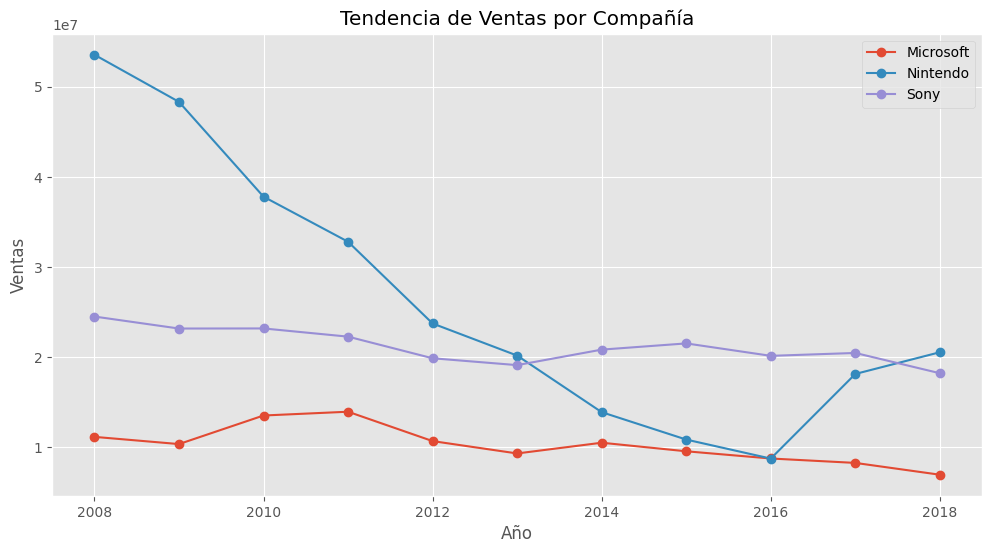

In [15]:
# Sumar las ventas por año para cada compañía
df_2_sum = df_2.groupby(['Year', 'Company'])['Sales'].sum().reset_index()

# Gráfico de tendencia de ventas por compañía
plt.figure(figsize=(12, 6))
for company in df_2_sum['Company'].unique():
    company_data = df_2_sum[df_2_sum['Company'] == company]
    plt.plot(company_data['Year'], company_data['Sales'], marker='o', label=company)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Tendencia de Ventas por Compañía')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

#### 5. Análisis de correlación entre variables

In [16]:
df_2.columns

Index(['Year', 'Dato', 'Console', 'Company', 'Sales'], dtype='object')

In [17]:
uniq_com_df_2 = df_2['Company'].unique()
uniq_con_df_2 = df_2['Console'].unique()

In [18]:
print('Columnas únicas en "Company"', uniq_com_df_2)
print('Columnas únicas en "Console"', uniq_con_df_2)

Columnas únicas en "Company" ['Nintendo' 'Sony' 'Microsoft']
Columnas únicas en "Console" ['Nintendo 3DS' 'Nintendo DS' 'Nintendo Switch' 'Nintendo Wii'
 'Nintendo Wii U' 'Sony PS Vita' 'Sony PS3' 'Sony PS4' 'Sony PSP'
 'Xbox One' 'Xbox360']


In [19]:
# Filtrar las columnas deseadas
col_df_2 = ['Company', 'Sales']
df_2_clean = df_2[col_df_2]

# Codificación One-Hot para la columna 'Company' sin eliminar ninguna categoría
df_2_clean_encoded = pd.get_dummies(df_2_clean, columns=['Company'])

# Calcular la correlación entre las variables codificadas y 'Sales'
correlation_matrix = df_2_clean_encoded.corr()

# Extraer las correlaciones con 'Sales'
sales_correlation = correlation_matrix['Sales'].drop('Sales')
print("Correlaciones con 'Sales':\n", sales_correlation)

Correlaciones con 'Sales':
 Company_Microsoft   -0.087009
Company_Nintendo     0.157865
Company_Sony        -0.084994
Name: Sales, dtype: float64


In [20]:
# Filtrar las columnas deseadas
col_df_2 = ['Console', 'Sales']
df_2_clean = df_2[col_df_2]

# Codificación One-Hot para la columna 'Console' sin eliminar ninguna categoría
df_2_clean_encoded = pd.get_dummies(df_2_clean, columns=['Console'])

# Calcular la correlación entre las variables codificadas y 'Sales'
correlation_matrix = df_2_clean_encoded.corr()

# Extraer las correlaciones con 'Sales'
sales_correlation = correlation_matrix['Sales'].drop('Sales')
print("Correlaciones con 'Sales':\n", sales_correlation)

Correlaciones con 'Sales':
 Console_Nintendo 3DS       0.053392
Console_Nintendo DS        0.281655
Console_Nintendo Switch    0.145726
Console_Nintendo Wii       0.095096
Console_Nintendo Wii U    -0.249951
Console_Sony PS Vita      -0.308959
Console_Sony PS3          -0.026384
Console_Sony PS4           0.295109
Console_Sony PSP          -0.061382
Console_Xbox One          -0.044098
Console_Xbox360           -0.069852
Name: Sales, dtype: float64


Observaciones:
* Se ha realizado un encoding para las variables categóricas comparando con Sales, para identificar si existen algunas correlaciones positivas o negativas.
* Se observa que solo Nintendo tiene correlación positiva con las Ventas, igual a 0.16, destacando que Nintendo ha sido la protagonista.
* Se observa que existen solo dos grandes destacados, uno de Sony y otro de Nintendo:
  * Nintendo DS, con una correlación positiva de 0.28.
  * Sony PS4 con una correlación positiva de 0.29.
* A la vez también se observa que tanto Nintendo como Sony tienen consolas con correlaciones muy negativas:
  * Ninentndo WII U tiene una correlación negativa de -0.25.
  * Sony PS Vita tiene una correlación negativa de -0.31.
* Microsoft tiene correlaciones prácticamente neutras y solo 2 modelos.

#### 6. Análisis de duplicados

In [21]:
# Identificar duplicados
duplicated_rows_2 = df_2.duplicated()

# Mostrar filas duplicadas
print("Filas duplicadas:")
print(df_2[duplicated_rows_2])

# Contar el número de filas duplicadas
num_duplicated_rows_2 = duplicated_rows_2.sum()

print(f"Numero de filas duplicadas: {num_duplicated_rows_2}")

if num_duplicated_rows_2 == 0:
    print('No se encuentran duplicadas en el dataframe df_2')

Filas duplicadas:
Empty DataFrame
Columns: [Year, Dato, Console, Company, Sales]
Index: []
Numero de filas duplicadas: 0
No se encuentran duplicadas en el dataframe df_2


#### 7. Exportación de los DataFrames

In [22]:
df_2.to_csv('dataset_clean/Consolas.csv', index=False)

#### 8. Conclusiones:
+ Las ventas de consolas están disminuyendo desde el 2008 al 2018.
+ Las ventas de consolas son cíclicas, cuando salen repuntan ventas hasta que se vuelven obsoletas en 3 a 5 años.
+ Las ventas dependen de la consola nueva que salga, a veces, salen nuevas y tiene buena recepción, y a veces, no. 
+ Nintengo tenía gran parte del mercado y lo fue perdiendo.
+ Tanto Microsoft como Sony han logrado mantener medianamente las ventas.
+ Considerando las correlaciones, no existe multicolinealidad.